In [7]:
import pandas as pd
import re
import nltk
# nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rivil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'stopwords'

In [4]:
dataset = pd.read_csv(r"D:\lh_data\ineuron\SMSSpamCollection", sep="\t",header=None)
dataset.columns = ["label","message"]
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Data cleaning and preprocessing

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rivil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
# create stopwords
keep_stopwords = ['no', 'nor', 'not','should', "should've", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",]
my_stopwords = [word for word in stopwords if word not in keep_stopwords]
my_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
# start cleaning 

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [17]:
len(dataset)

5572

In [19]:
# remove non aplha numeric characters

corpus=[]
for i in range(len(dataset)):
    text = re.sub("[^a-zA-Z1-9]", " ",dataset.message[i])   # removes any character that does not contain alpha numeric
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if word not in my_stopwords]
    text = " ".join(text)
    corpus.append(text)
    print(text)

go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
free entri 2 wkli comp win fa cup final tkt 21st may 2 5 text fa 87121 receiv entri question std txt rate c appli 845281 75over18
u dun say earli hor u c alreadi say
nah think goe usf live around though
freemsg hey darl 3 week no word back like fun still tb ok xxx std chg send 1 5 rcv
even brother not like speak treat like aid patent
per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun
winner valu network custom select receivea 9 prize reward claim call 9 617 1461 claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 8 2986 3
gonna home soon want talk stuff anymor tonight k cri enough today
six chanc win cash 1 2 pound txt csh11 send 87575 cost 15 p day 6day 16 tsandc appli repli hl 4 info
urgent 1 week free membership 1 prize jackpot txt word claim no 81 1 c www dbuk ne

In [94]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2 5 text fa 87121 receiv entri question std txt rate c appli 845281 75over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week no word back like fun still tb ok xxx std chg send 1 5 rcv',
 'even brother not like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 9 prize reward claim call 9 617 1461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 8 2986 3',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 1 2 pound txt csh11 send 87575 cost 15 p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free membership 1 

# train test split

In [21]:
dataset.label.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [22]:
# independent/ dependant features
y = pd.get_dummies(dataset.label, drop_first = True)
y.head()

,spam
0,0
1,0
2,1
3,0
4,0


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(corpus,y,test_size=0.2, random_state=0)


In [46]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4457, 1115, 4457, 1115)

In [47]:
# check for imbalance - YES is IMBALANCED
dataset.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# CountVectorizer

In [48]:
# CREATE BOV
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [49]:
X_train = cv.fit_transform(X_train).toarray()
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
X_train[0:2,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
X_test = cv.transform(X_test).toarray()
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [55]:
X_test.shape   # showing the amount of records and the vocabulary size

(1115, 6364)

In [56]:
cv.vocabulary_   # words and the index location within the array

{'no': 3939,
 'good': 2617,
 'movi': 3774,
 'ok': 4048,
 'leav': 3354,
 'hourish': 2889,
 'free': 2443,
 'give': 2584,
 'otherwis': 4120,
 'nalla': 3837,
 'adi': 673,
 'entey': 2132,
 'nattil': 3855,
 'kittum': 3265,
 'emigr': 2107,
 'someth': 5183,
 'mayb': 3615,
 'bit': 1127,
 'hope': 2872,
 'got': 2633,
 'home': 2855,
 'babe': 990,
 'still': 5323,
 'awak': 968,
 'kay': 3225,
 'sinc': 5069,
 'alreadi': 766,
 'not': 3972,
 'workin': 6230,
 'get': 2563,
 'job': 3160,
 'said': 4829,
 'matter': 3607,
 'mind': 3678,
 'say': 4869,
 'oh': 4043,
 'yeah': 6309,
 'diet': 1889,
 'flew': 2369,
 'window': 6176,
 'sorri': 5205,
 'thing': 5617,
 'may': 3614,
 'pub': 4527,
 'later': 3330,
 'ill': 2973,
 'call': 1332,
 'even': 2181,
 'idea': 2952,
 'dear': 1793,
 'reach': 4617,
 'room': 4779,
 'look': 3452,
 'scrumptiou': 4894,
 'daddi': 1757,
 'want': 6057,
 'eat': 2056,
 'night': 3922,
 'long': 3449,
 'badrith': 998,
 'chennai': 1450,
 'sure': 5432,
 'pick': 4292,
 'us': 5920,
 'competit': 1588,
 '

In [58]:
# CREATE BOV

X_train, X_test, y_train, y_test = train_test_split(corpus,y,test_size=0.2, random_state=0)

cv = CountVectorizer(max_features=2500)
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()
X_test.shape   # showing the amount of records and the vocabulary size

(1115, 2500)

In [60]:
len(cv.vocabulary_)   # words and the index location within the array

2500

In [61]:
cv.vocabulary_   # words and the index location within the array

{'no': 1566,
 'good': 975,
 'movi': 1499,
 'ok': 1596,
 'leav': 1279,
 'free': 913,
 'give': 963,
 'otherwis': 1625,
 'nalla': 1533,
 'someth': 2039,
 'mayb': 1414,
 'bit': 436,
 'hope': 1087,
 'got': 980,
 'home': 1081,
 'babe': 368,
 'still': 2086,
 'awak': 362,
 'kay': 1227,
 'sinc': 1998,
 'alreadi': 281,
 'not': 1577,
 'workin': 2452,
 'get': 956,
 'job': 1201,
 'said': 1889,
 'matter': 1408,
 'mind': 1448,
 'say': 1902,
 'oh': 1595,
 'yeah': 2482,
 'diet': 735,
 'window': 2427,
 'sorri': 2049,
 'thing': 2180,
 'may': 1413,
 'pub': 1746,
 'later': 1266,
 'ill': 1138,
 'call': 532,
 'even': 820,
 'idea': 1129,
 'dear': 703,
 'reach': 1785,
 'room': 1874,
 'look': 1330,
 'daddi': 686,
 'want': 2374,
 'eat': 787,
 'night': 1562,
 'long': 1328,
 'chennai': 578,
 'sure': 2131,
 'pick': 1666,
 'us': 2312,
 'competit': 623,
 'da': 684,
 'car': 546,
 'park': 1640,
 'okay': 1597,
 'soon': 2046,
 'best': 416,
 'yar': 2479,
 'els': 797,
 'thk': 2183,
 'sort': 2050,
 'funni': 932,
 'yup': 249

In [64]:
list(cv.vocabulary_.items())[:10]

[('no', 1566),
 ('good', 975),
 ('movi', 1499),
 ('ok', 1596),
 ('leav', 1279),
 ('free', 913),
 ('give', 963),
 ('otherwis', 1625),
 ('nalla', 1533),
 ('someth', 2039)]

In [63]:
list(cv.vocabulary_.items())[-10:]

[('ralli', 1772),
 ('lucozad', 1361),
 ('bloomberg', 455),
 ('kg', 1234),
 ('heater', 1041),
 ('acl', 224),
 ('bootydeli', 470),
 ('61743386', 96),
 ('rel', 1817),
 ('luci', 1358)]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(corpus,y,test_size=0.2, random_state=0)

cv = CountVectorizer(max_features=2500, ngram_range=(1,2))
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()
X_test.shape   # showing the amount of records and the vocabulary size

(1115, 2500)

In [66]:
list(cv.vocabulary_.items())[:10]

[('no', 1464),
 ('good', 891),
 ('movi', 1400),
 ('ok', 1525),
 ('leav', 1179),
 ('free', 788),
 ('give', 858),
 ('otherwis', 1565),
 ('someth', 1965),
 ('mayb', 1315)]

In [67]:
list(cv.vocabulary_.items())[-10:]

[('tick', 2151),
 ('tick tick', 2152),
 ('13', 8),
 ('award prize', 215),
 ('mummi', 1416),
 ('mell', 1326),
 ('day happi', 569),
 ('due', 648),
 ('chariti', 405),
 ('pack', 1571)]

### Note - max_features may be an hyper parameter; ngram_range also

# algorithms

In [72]:
# is random forest impact from outliers? - No

from sklearn.ensemble import RandomForestClassifier

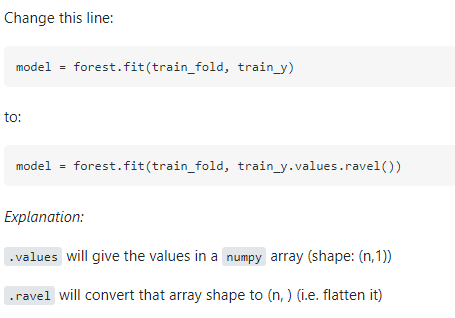

In [73]:
y_train

,spam
1114,0
3589,0
3095,0
1012,0
3320,0
...,...
4931,1
3264,0
1653,1
2607,0


In [75]:
y_train.values

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=uint8)

In [76]:
y_train.values.ravel()

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [78]:
classifier = RandomForestClassifier().fit(X_train, y_train.values.ravel())

In [79]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [82]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [83]:
accuracy_score(y_test, y_pred)

0.9829596412556054

In [84]:
confusion_matrix(y_test, y_pred)

array([[955,   0],
       [ 19, 141]], dtype=int64)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       1.00      0.88      0.94       160

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# TfidfVectorizer

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(corpus,y,test_size=0.2, random_state=0)

In [142]:
X_train

['no good movi ok leav hourish',
 'free give otherwis nalla adi entey nattil kittum',
 'emigr someth ok mayb 5 3 bit hope',
 'got home babe still awak',
 'kay sinc alreadi',
 'not workin get job',
 'said not matter mind say matter',
 'oh yeah diet flew window',
 'sorri no got thing may pub later',
 'ill call even ill idea',
 'dear reach room',
 'got look scrumptiou daddi want eat night long',
 'badrith chennai sure pick us no competit',
 'da car park',
 'okay soon best',
 'yar els thk sort funni thing',
 'yup izzit still rain heavili co e mrt c outsid',
 'way ur home',
 'ok pop ask bout someth said around tonght wen girl come',
 'talk g x',
 'cool tyler take gonna buy drop place later tonight total order quarter got enough',
 '5 2 work time',
 'yup free',
 'mayb westshor hyde park villag place near hous',
 'said would woke',
 'no drama pl enough famili struggl hot sun strang place no reason should ego not go not invit actual necess go wait seriou reppurcuss',
 'what come hill monster h

In [146]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [147]:
tf_idf = TfidfVectorizer()

In [148]:
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)

In [149]:
X_train_tf.shape, X_test_tf.shape

((4457, 6364), (1115, 6364))

In [150]:
# is random forest impact from outliers? - No
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier().fit(X_train_tf, y_train.values.ravel())

In [151]:
y_pred = classifier.predict(X_test_tf)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [152]:
accuracy_score(y_test, y_pred)

0.979372197309417

In [153]:
confusion_matrix(y_test, y_pred)

array([[955,   0],
       [ 23, 137]], dtype=int64)

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       1.00      0.86      0.92       160

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

